## 주성분 분석(PCA)연습

In [4]:
# 212 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib ;  import matplotlib.pyplot as plt
# 데이터 시각화:추세, 산점도 행렬 
import seaborn as sns
# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm
# 그래프 표시
%matplotlib inline

In [5]:
# 맑은 고딕 적용
matplotlib.rc('font', family = 'Malgun Gothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus = False)

In [6]:
# 213 Page
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [7]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x = df_raw.drop("EVAL",axis=1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [8]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

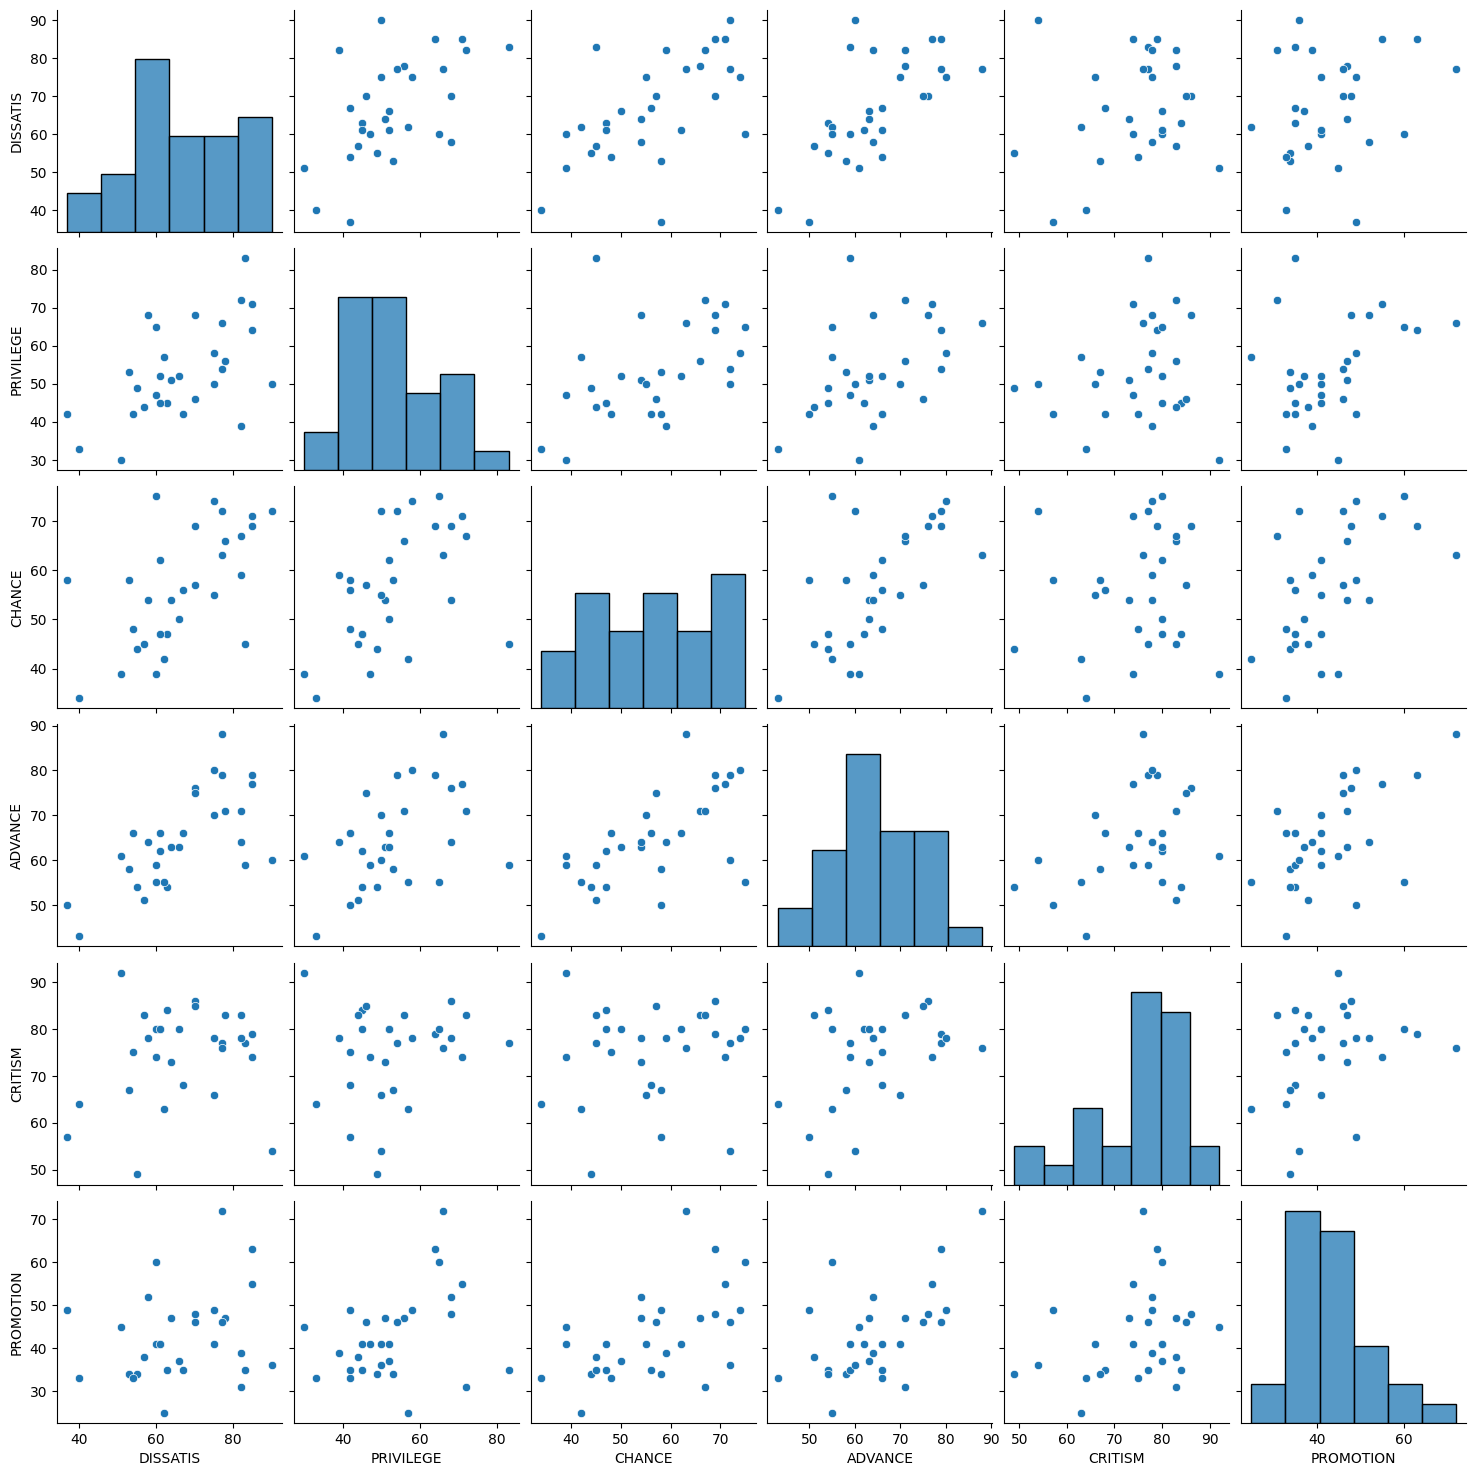

In [9]:
# 214 Page
# 산점도 행렬
sns.pairplot(df_raw_x)

In [10]:
# Pearson 상관계수: pearson, kendall, spearman
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [11]:
# 215 Page
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [12]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환:ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :
 (30, 6)


In [13]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols ) 
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [14]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [15]:
# 216 Page
# 주성분 분석:주성분1(Prin1)~주성분6(Prin6) 생성 및 저장
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA Data :\n {}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))

PCA Data :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


In [16]:
# 주성분 점수 저장(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [17]:
# 217 Page
# 주성분 분석 통계량 저장:주성분 번호, Eigenvalue, Eigenvalue ratio 
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missin

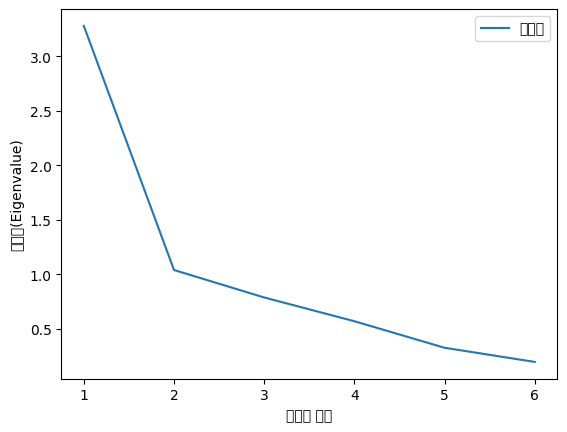

In [18]:
# 218 Page
# Scree Plot 
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

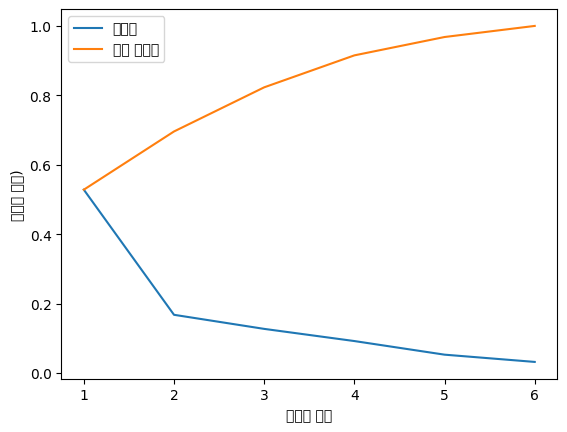

In [19]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["EigenValueRatio"], label="고유값")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], 
         df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [20]:
# 219 Page
# 주성분 분석 데이터의 변수 이름  
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
# 주성분 Prin1~6까지의 고유벡터 저장
# 전치 결과pd.DataFrame(pca.components_, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치, 부호 변경)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

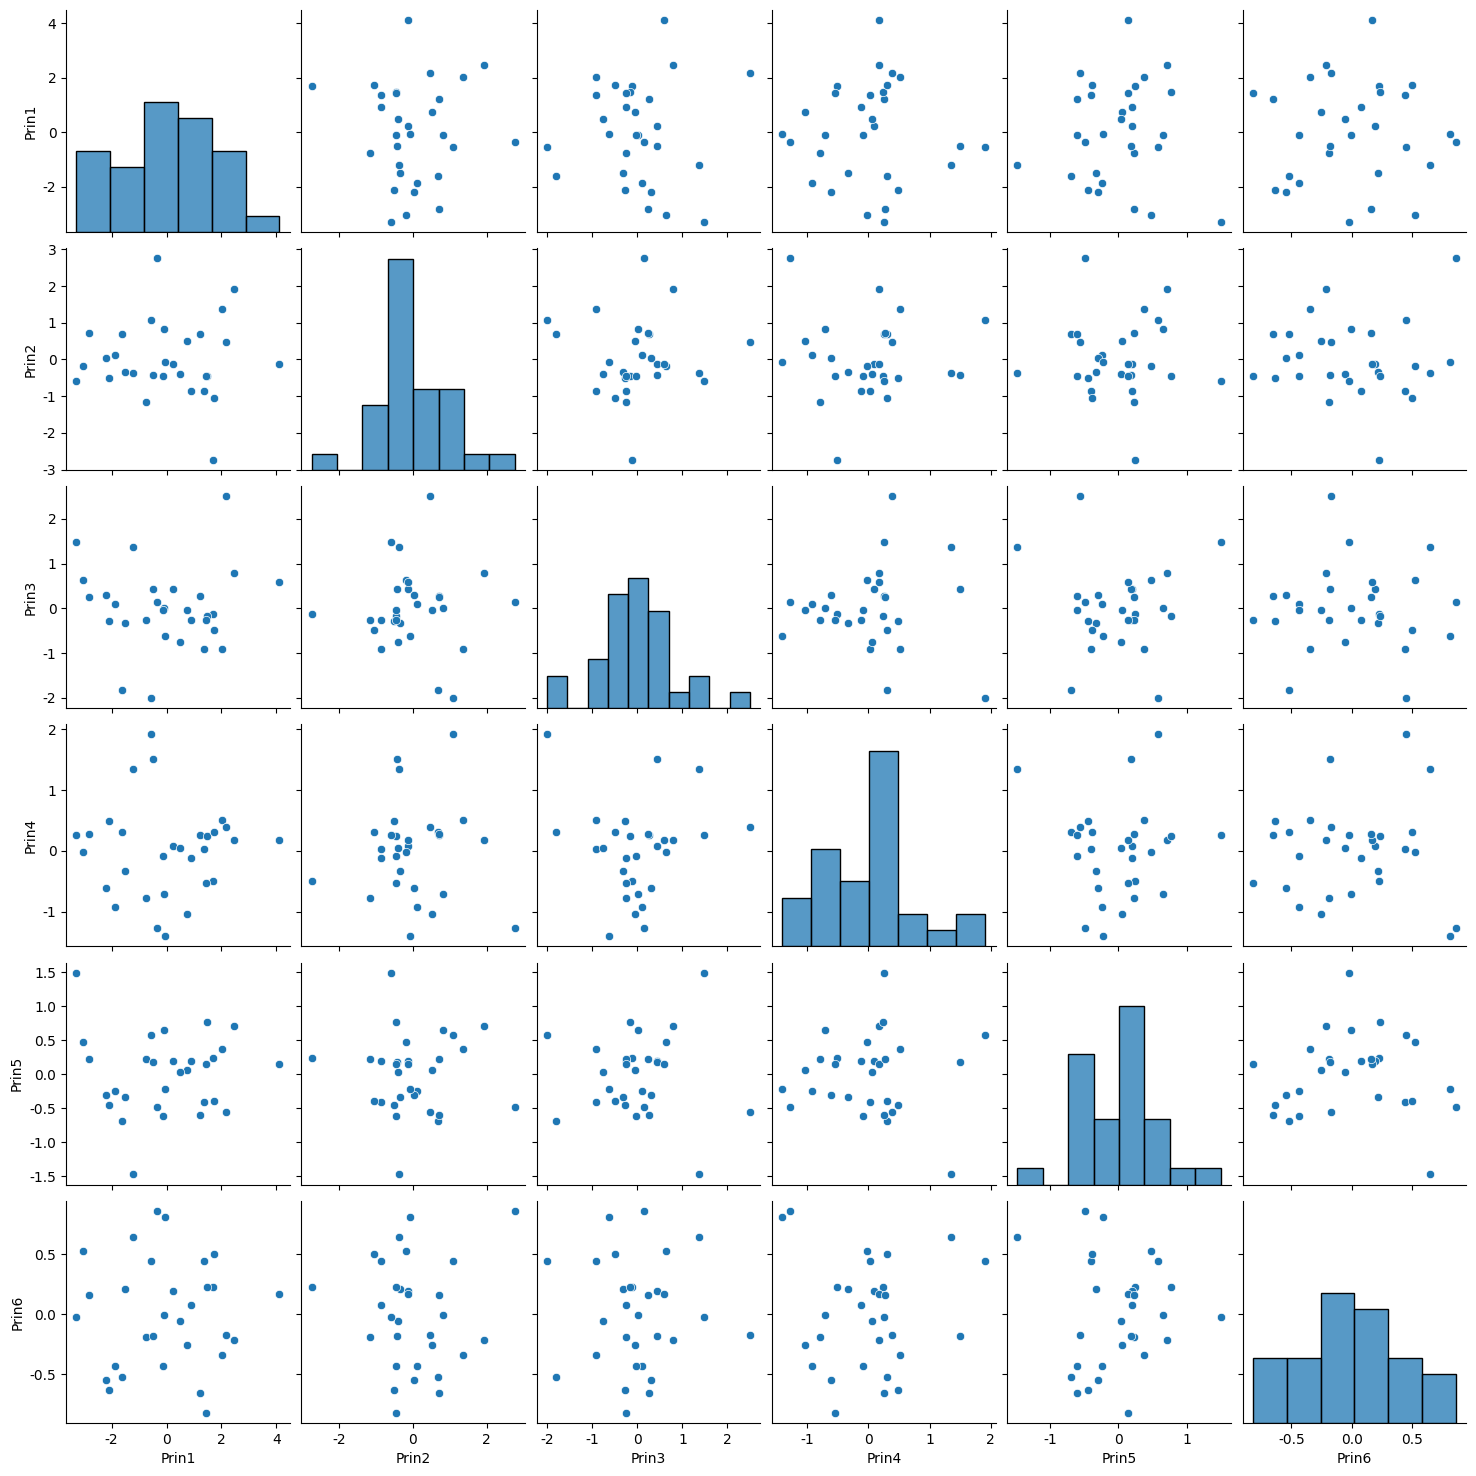

In [21]:
# 220 Page
# 산점도 행렬
sns.pairplot(df_pca)

In [22]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [23]:
# 221 Page
# 다중선형 회귀분석: 원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.24e-05
Time:                        08:51:15   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [24]:
# 다중선형 회귀분석: Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.24e-05
Time:                        08:51:15   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [25]:
# 다중선형 주성분 회귀분석: 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1", "Prin2", "Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.02e-05
Time:                        08:51:15   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0